<a href="https://colab.research.google.com/github/ranicah/Project1-Learning/blob/main/Porto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description

This dataset contains real-world patient health data that has been carefully cleaned and anonymized to protect privacy. It provides vital signs and clinical parameters for 1,000 patients, along with their corresponding health risk levels (Normal, Low, Medium, High).

The dataset is designed for machine learning, data science, and healthcare analytics research. It can be used to build predictive models that assist healthcare professionals in early detection of high-risk patients and better medical decision-making.

Sumber Dataset:

https://www.kaggle.com/datasets/ludocielbeckett/health-risk-prediction-anonymized-real-data?resource=download

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data prep
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

# Data Understanding

In [4]:
data = pd.read_csv("Health_Risk_Dataset.csv")
data

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low
...,...,...,...,...,...,...,...,...,...,...
995,P0107,18,96,1,124,72,37.2,A,0,Normal
996,P0271,19,95,1,129,70,38.1,A,0,Low
997,P0861,39,82,1,101,137,37.5,A,1,High
998,P0436,15,92,1,106,108,38.6,A,0,Medium


Missing Value

In [5]:
print(data.isnull().sum())

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64


<Axes: >

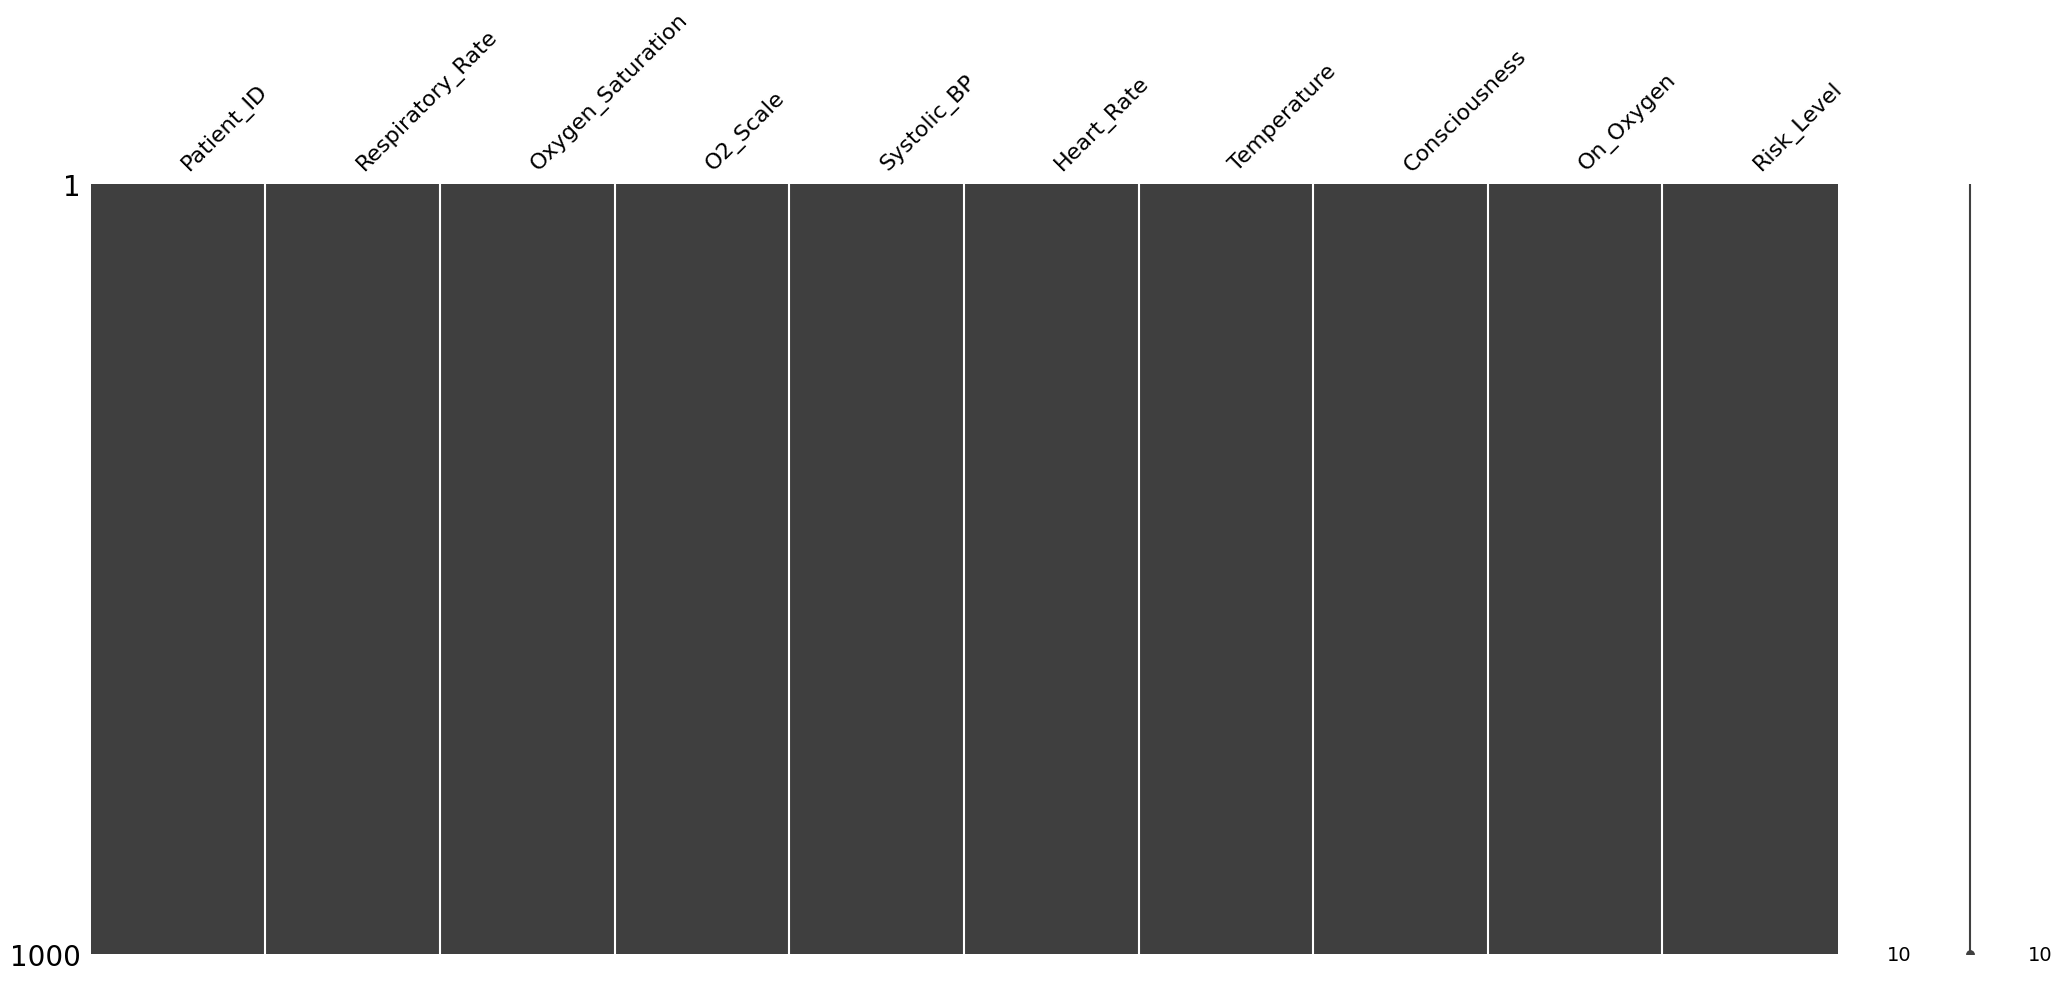

In [6]:
import missingno
missingno.matrix(data)

Duplicated Data

In [7]:
data.duplicated().sum()

np.int64(0)

Distribution Data

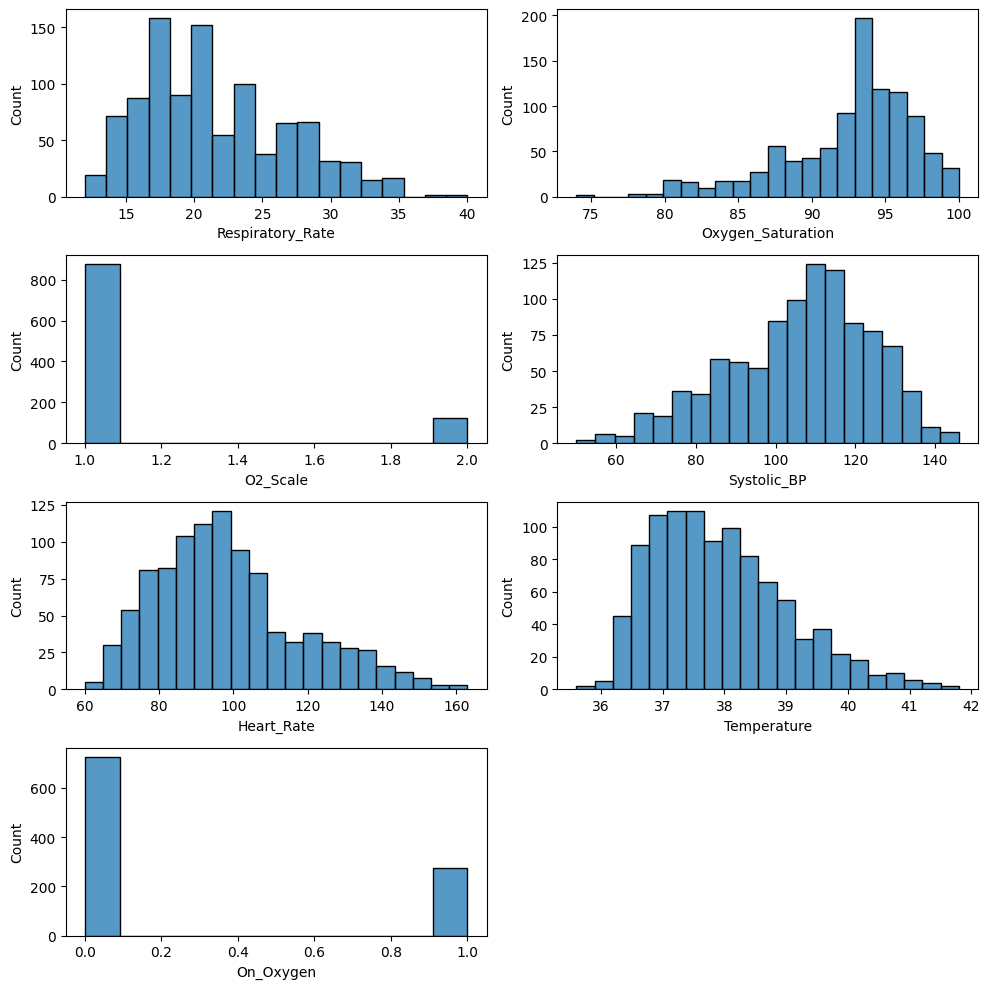

In [8]:
numerik = data.select_dtypes(include = 'number')

plt.figure(figsize = (10,10))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(4,2,posisi)
    sns.histplot(data[setiap_kolom])
    posisi = posisi + 1
    plt.tight_layout()

Outlier

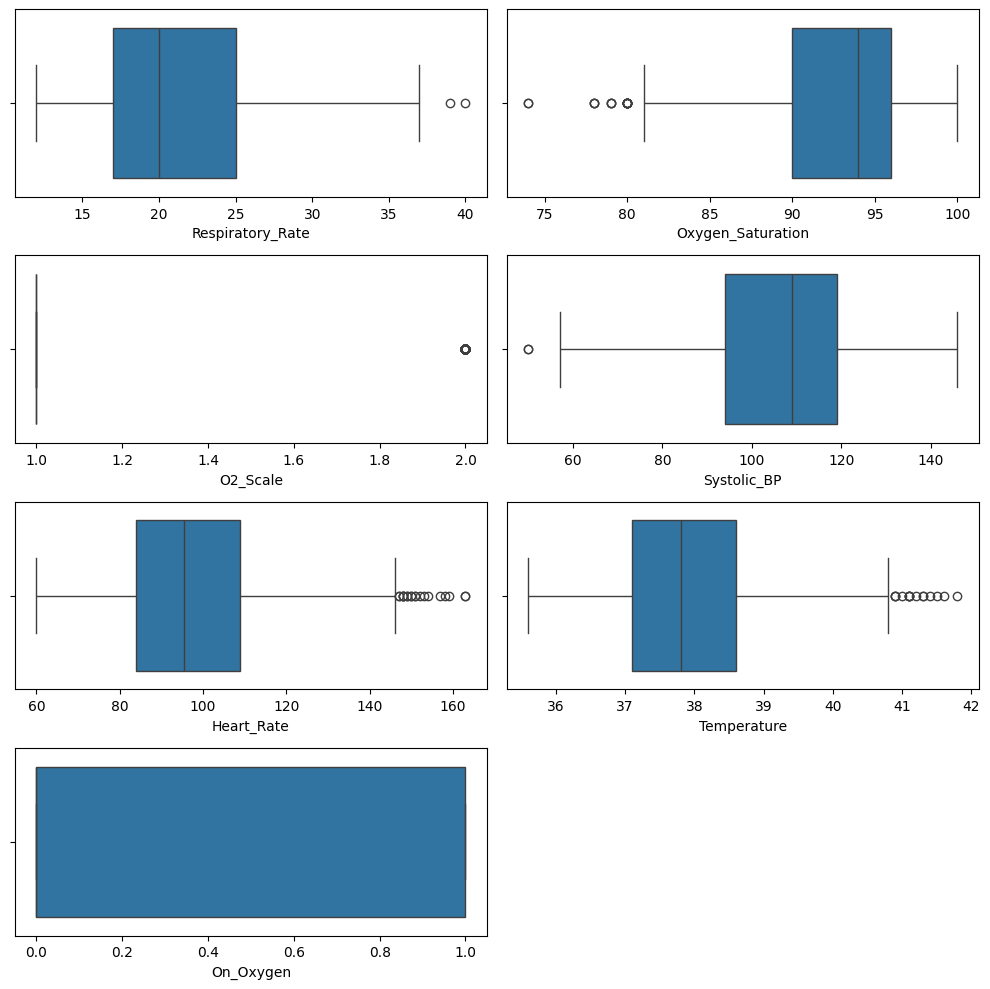

In [9]:
numerik = data.select_dtypes(include = 'number')

plt.figure(figsize = (10,10))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(4,2,posisi)
    sns.boxplot(x = data[setiap_kolom])
    posisi = posisi + 1
    plt.tight_layout()

Correlation

<Axes: >

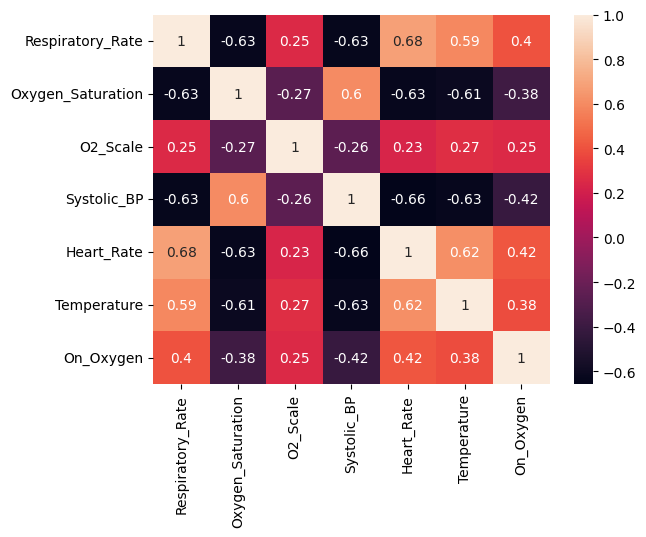

In [10]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

Unique Values

In [11]:
kategorik = data.select_dtypes(include = 'number')
print(kategorik.nunique())

Respiratory_Rate     27
Oxygen_Saturation    24
O2_Scale              2
Systolic_BP          89
Heart_Rate           99
Temperature          61
On_Oxygen             2
dtype: int64


In [12]:
for col in kategorik:
    print(f'''Value count kolom {col}:''')
    print(kategorik[col].value_counts())
    print()

Value count kolom Respiratory_Rate:
Respiratory_Rate
20    95
19    90
16    87
18    82
17    76
21    57
22    55
23    52
24    48
25    38
29    36
15    36
26    35
14    35
30    32
27    30
28    30
31    22
33    15
13    13
34    12
32     9
12     6
35     5
37     2
40     1
39     1
Name: count, dtype: int64

Value count kolom Oxygen_Saturation:
Oxygen_Saturation
95     119
94     118
96     115
92      92
97      89
93      79
91      54
98      48
88      48
90      43
89      39
86      27
99      24
85      18
84      18
82      16
80      10
83      10
81       9
87       8
100      8
78       3
79       3
74       2
Name: count, dtype: int64

Value count kolom O2_Scale:
O2_Scale
1    876
2    124
Name: count, dtype: int64

Value count kolom Systolic_BP:
Systolic_BP
111    34
117    29
118    28
112    28
113    27
       ..
143     1
64      1
59      1
58      1
62      1
Name: count, Length: 89, dtype: int64

Value count kolom Heart_Rate:
Heart_Rate
95     32
92    

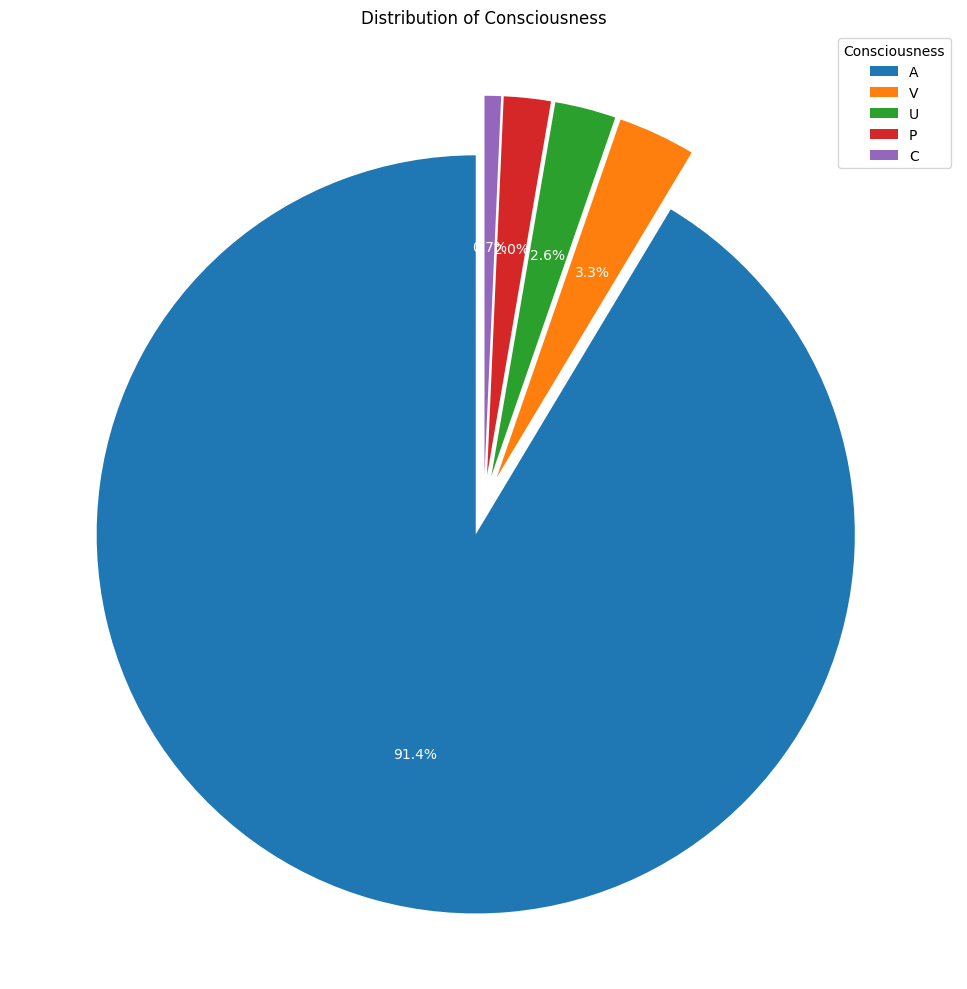

In [13]:
# Calculate value counts for 'Consciousness'
consciousness_counts = data['Consciousness'].value_counts()

explode = [0.08] * len(consciousness_counts)

# Pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    consciousness_counts.values,
    labels=consciousness_counts.index,
    autopct='%1.1f%%',
    textprops={'color': "w"},
    explode=explode,
    startangle=90
)

plt.title("Distribution of Consciousness")
plt.legend(title="Consciousness")
plt.tight_layout()
plt.show()

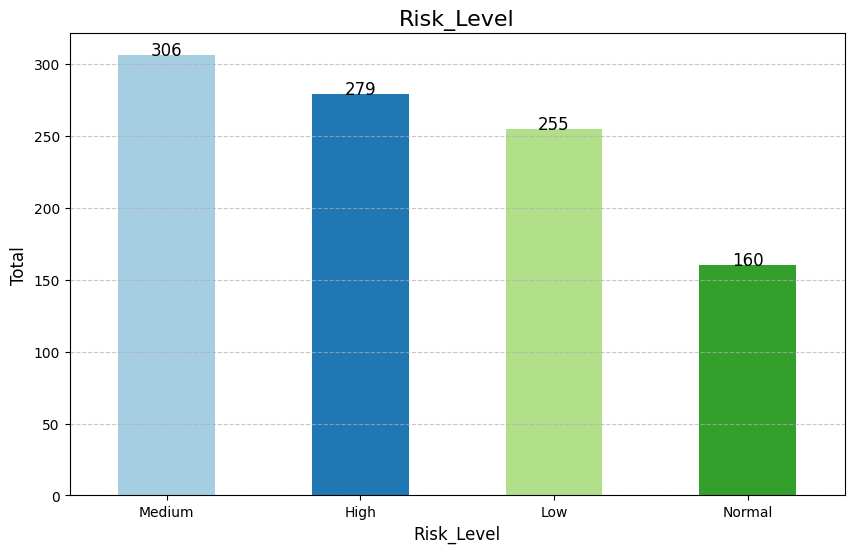

In [14]:
# Create a bar chart with different colors for each bar
riskle_counts = data['Risk_Level'].value_counts()
riskle_counts

plt.figure(figsize=(10,6))
bars = riskle_counts.plot(kind='bar', color=plt.cm.Paired(range(len(riskle_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Risk_Level', fontsize=16)
plt.xlabel('Risk_Level', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('RiskLe.png')
plt.show()

# Modelling

In [15]:
data.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


Data Splitting

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Risk_Level'] = le.fit_transform(data['Risk_Level'])

In [17]:
X = data.drop(columns = 'Risk_Level')
Y = data['Risk_Level']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.2,
    random_state = 42,
    stratify = Y #klasifikasi
)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 9), (200, 9), (800,), (200,))

Data Preparation

In [20]:
num_col = ['Respiratory_Rate', 'Oxygen_Saturation', 'Systolic_BP', 'Heart_Rate', 'Temperature']
cat_col = ['Patient_ID', 'Consciousness', 'O2_Scale', 'On_Oxygen']

transformer = ColumnTransformer([
    ('num', MinMaxScaler(), num_col),
    ('cat', OneHotEncoder(handle_unknown = 'ignore'), cat_col)
    ],
    remainder = 'passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', MinMaxScaler(),
                                 ['Respiratory_Rate', 'Oxygen_Saturation',
                                  'Systolic_BP', 'Heart_Rate', 'Temperature']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Patient_ID', 'Consciousness', 'O2_Scale',
                                  'On_Oxygen'])])

In [21]:
data

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,2
1,P0738,28,92,2,116,151,38.5,P,1,0
2,P0741,29,91,1,79,135,38.4,A,0,0
3,P0661,24,96,1,95,92,37.3,A,0,2
4,P0412,20,96,1,97,97,37.4,A,0,1
...,...,...,...,...,...,...,...,...,...,...
995,P0107,18,96,1,124,72,37.2,A,0,3
996,P0271,19,95,1,129,70,38.1,A,0,1
997,P0861,39,82,1,101,137,37.5,A,1,0
998,P0436,15,92,1,106,108,38.6,A,0,2


Experiment 1 : Based Model

In [22]:
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier(random_state = 0)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 0)
xgb = XGBClassifier(random_state = 0)
gb = GradientBoostingClassifier(random_state = 0)

In [23]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

# List penyimpanan metrik
train_score_list = []
train_score_std_list = []

train_accuracy_list = []
train_accuracy_std_list = []

train_f1_list = []
train_f1_std_list = []

train_recall_list = []
train_recall_std_list = []

# Loop untuk semua model
for i in [lr, dt, knn, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    # Evaluasi menggunakan cross_validate untuk multiple scoring
    scores = cross_validate(
        model,
        X_train,
        y_train,
        cv=StratifiedKFold(n_splits=5),
        scoring={
            'accuracy': 'accuracy',
            'f1_weighted': 'f1_weighted',
            'recall_weighted': 'recall_weighted'
        },
        return_train_score=False
    )

    # Accuracy
    train_accuracy_list.append(scores['test_accuracy'].mean())
    train_accuracy_std_list.append(scores['test_accuracy'].std())

    # F1
    train_f1_list.append(scores['test_f1_weighted'].mean())
    train_f1_std_list.append(scores['test_f1_weighted'].std())

    # Recall
    train_recall_list.append(scores['test_recall_weighted'].mean())
    train_recall_std_list.append(scores['test_recall_weighted'].std())

    # Fit model ke full data training
    model.fit(X_train, y_train)


In [24]:
df1 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'accuracy_mean': train_accuracy_list,
    'accuracy_std': train_accuracy_std_list,
    'f1_mean': train_f1_list,
    'f1_std': train_f1_std_list,
    'recall_mean': train_recall_list,
    'recall_std': train_recall_std_list
})

(df1)

,model,accuracy_mean,accuracy_std,f1_mean,f1_std,recall_mean,recall_std
0,Logistic Regression,0.92250,0.012247,0.922732,0.012359,0.92250,0.012247
1,Decision Tree,0.87625,0.027783,0.875831,0.029156,0.87625,0.027783
2,KNN,0.94250,0.014470,0.942608,0.014358,0.94250,0.014470
3,Random Forest,0.94625,0.017941,0.946460,0.017837,0.94625,0.017941
4,Gradient Boosting,0.92750,0.017941,0.927524,0.018250,0.92750,0.017941
5,XGBoost,0.94250,0.025434,0.942394,0.025496,0.94250,0.025434


Experiment 2: Without Outlier

In [25]:
def hapus_outliers_seluruhnya(df, target):
    kolom_numerik = df.drop(columns=target).select_dtypes(include='number').columns
    index_outliers = set()

    for kolom in kolom_numerik:
        q1 = df[kolom].quantile(0.25)
        q3 = df[kolom].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # cari baris yang outlier di kolom ini
        outlier_idx = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].index
        index_outliers.update(outlier_idx)

    # hapus semua baris yang merupakan outlier di kolom mana pun
    return df.drop(index_outliers)

In [26]:
# Gabungkan X_train dan y_train dulu
train_set = X_train.copy()
train_set['Risk_Level'] = y_train

# Hapus outliers hanya dari training set
train_set_no_outliers = hapus_outliers_seluruhnya(train_set, 'Risk_Level')

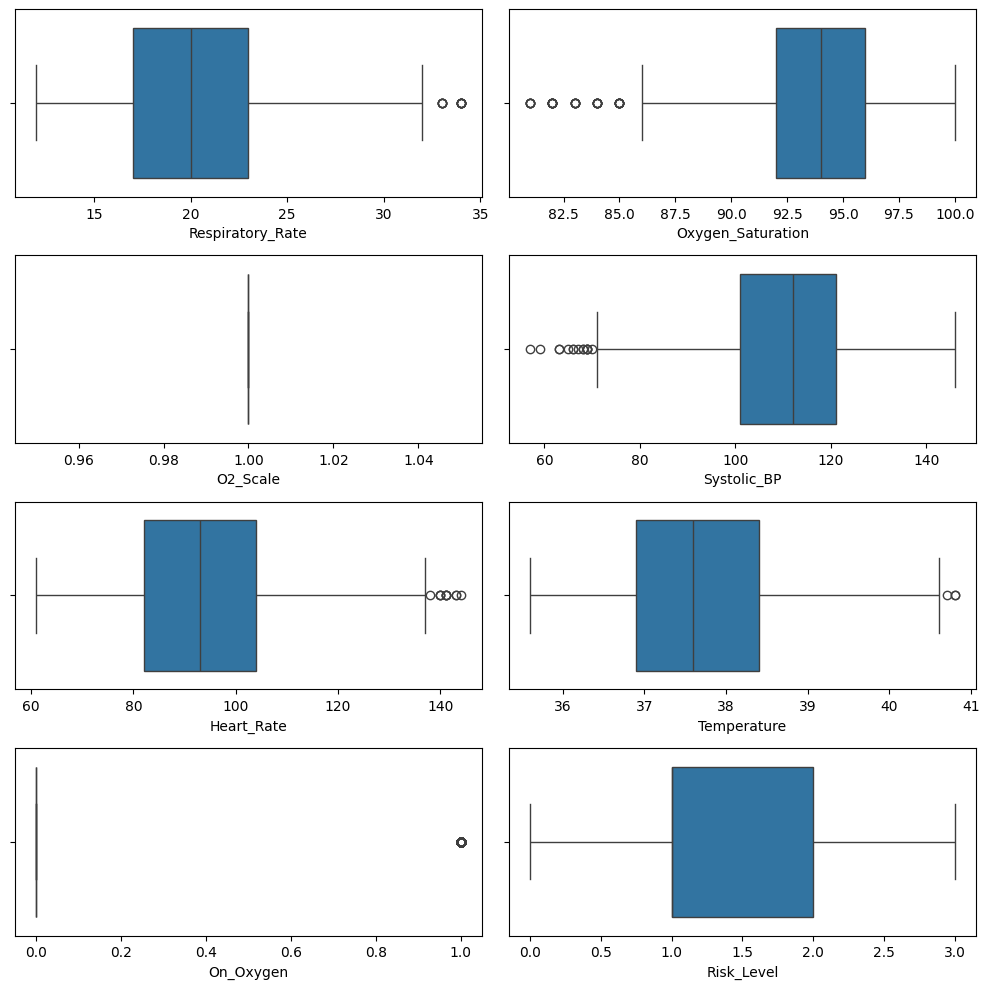

In [27]:
# Dataset without outlier
import matplotlib.pyplot as plt
import seaborn as sns

numerik = train_set_no_outliers.select_dtypes(include='number')

plt.figure(figsize=(10,10))
posisi = 1
for kolom in numerik.columns:
    plt.subplot(4, 2, posisi)
    sns.boxplot(x = train_set_no_outliers[kolom])
    posisi += 1
    plt.tight_layout()

In [28]:
X_train_no_outliers = train_set_no_outliers.drop(columns='Risk_Level')
y_train_no_outliers = train_set_no_outliers['Risk_Level']

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_train_no_outliers,
    y_train_no_outliers,
    test_size = 0.2,
    random_state = 42,
    stratify = y_train_no_outliers
)

In [29]:
X_train_no_outliers.shape, X_test_no_outliers.shape, y_train_no_outliers.shape, y_test_no_outliers.shape

((529, 9), (133, 9), (529,), (133,))

In [30]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

# List penyimpanan metrik
train_score_list = []
train_score_std_list = []

train_accuracy_list = []
train_accuracy_std_list = []

train_f1_list = []
train_f1_std_list = []

train_recall_list = []
train_recall_std_list = []

# Loop untuk semua model
for i in [rf, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    # Evaluasi menggunakan cross_validate untuk multiple scoring
    scores = cross_validate(
        model,
        X_train_no_outliers,
        y_train_no_outliers,
        cv=StratifiedKFold(n_splits=5),
        scoring={
            'accuracy': 'accuracy',
            'f1_weighted': 'f1_weighted',
            'recall_weighted': 'recall_weighted'
        },
        return_train_score=False
    )

    # Accuracy
    train_accuracy_list.append(scores['test_accuracy'].mean())
    train_accuracy_std_list.append(scores['test_accuracy'].std())

    # F1
    train_f1_list.append(scores['test_f1_weighted'].mean())
    train_f1_std_list.append(scores['test_f1_weighted'].std())

    # Recall
    train_recall_list.append(scores['test_recall_weighted'].mean())
    train_recall_std_list.append(scores['test_recall_weighted'].std())

    # Fit model ke full data training
    model.fit(X_train, y_train)


In [31]:
df2 = pd.DataFrame({
    'model': ['Random Forest','XGBoost'],

    'accuracy_mean': train_accuracy_list,
    'accuracy_std': train_accuracy_std_list,
    'f1_mean': train_f1_list,
    'f1_std': train_f1_std_list,
    'recall_mean': train_recall_list,
    'recall_std': train_recall_std_list
})

(df2)

,model,accuracy_mean,accuracy_std,f1_mean,f1_std,recall_mean,recall_std
0,Random Forest,0.937646,0.022739,0.937971,0.022342,0.937646,0.022739
1,XGBoost,0.916837,0.026240,0.916680,0.025847,0.916837,0.026240


Eksperimen 3

In [32]:
persentasey = y_train.value_counts(normalize = True)
persentasey

,proportion
Risk_Level,
2,0.30625
0,0.27875
1,0.25500
3,0.16000


In [33]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


train_score_list = []
train_score_std_list = []
#test_score_list = []

train_accuracy_list = []
train_accuracy_std_list = []

train_f1_list = []
train_f1_std_list = []

train_recall_list = []
train_recall_std_list = []

for i in [rf, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('balencing', SMOTE()),
        ('model', i)
    ])
    # Train model
    score = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'f1_weighted')
    # menghitung mean f1 score setiap split
    train_score_list.append(score.mean())
    # menghitung standar deviasi
    train_score_std_list.append(score.std())

    # Accuracy
    train_accuracy_list.append(scores['test_accuracy'].mean())
    train_accuracy_std_list.append(scores['test_accuracy'].std())

    # F1
    train_f1_list.append(scores['test_f1_weighted'].mean())
    train_f1_std_list.append(scores['test_f1_weighted'].std())

    # Recall
    train_recall_list.append(scores['test_recall_weighted'].mean())
    train_recall_std_list.append(scores['test_recall_weighted'].std())

    # Prediksi
    model.fit(X_train, y_train)
    #ypred_test = model.predict(X_test)

In [34]:
df3 = pd.DataFrame({
    'model': ['Random Forest', 'XGBoost'],

    'accuracy_mean': train_accuracy_list,
    'accuracy_std': train_accuracy_std_list,
    'f1_mean': train_f1_list,
    'f1_std': train_f1_std_list,
    'recall_mean': train_recall_list,
    'recall_std': train_recall_std_list
})

(df3)

,model,accuracy_mean,accuracy_std,f1_mean,f1_std,recall_mean,recall_std
0,Random Forest,0.916837,0.02624,0.91668,0.025847,0.916837,0.02624
1,XGBoost,0.916837,0.02624,0.91668,0.025847,0.916837,0.02624


In [35]:
from collections import Counter

X_trans = transformer.fit_transform(X_train)
X_res, y_res = SMOTE(random_state=42).fit_resample(X_trans, y_train)

print("Distribusi sesudah SMOTE:", Counter (y_res))


Distribusi sesudah SMOTE: Counter({1: 245, 0: 245, 2: 245, 3: 245})


Concat all experiment value

In [36]:
df1['eksperimen'] = 'Based Model'
df2['eksperimen'] = 'Without Outliers'
df3['eksperimen'] = 'Resampling SMOTE'

# penggabungan semua df score
df_gab = pd.concat([df1, df2, df3], axis = 0)
df_gab = df_gab.set_index(['eksperimen','model'])

# highlight ke score terbaik
#df_gab.style.highlight_max(subset = ['accuracy_mean'],color = 'lightgreen', axis = 0).highlight_min(subset = ['accuracy_std'],color = 'lightgreen', axis = 0).highlight_min(subset = ['f1_mean'],color = 'lightgreen', axis = 0).highlight_min(subset = ['f1_std'],color = 'lightgreen', axis = 0).highlight_min(subset = ['recall_std'],color = 'lightgreen', axis = 0)
df_gab.style.highlight_max(subset = ['accuracy_mean'], color = 'lightgreen', axis = 0).highlight_min(subset = ['accuracy_std'], color = 'lightgreen', axis = 0).highlight_max(subset = ['f1_mean'], axis = 0).highlight_min(subset = ['f1_std'], axis = 0).highlight_max(subset = ['recall_mean'], axis = 0).highlight_min(subset = ['recall_std'], axis = 0)



Hyperparameter Tuning

In [37]:
# Grid Search Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.metrics import classification_report

# Parameter yang akan dicoba
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

# Model
rf_model = RandomForestClassifier(random_state=0)

# Pipeline
pipeline = Pipeline([
    ('preprocessing', transformer),
    ('balancing', SMOTE()),
    ('model', rf_model)
])

# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring={
        'accuracy': 'accuracy',
        'precision': 'precision_weighted',
        'recall': 'recall_weighted',
        'f1': 'f1_weighted'
    },
    cv=5,
    n_jobs=-1,
    refit='f1'   # pilih model terbaik berdasarkan F1 weighted
)

# Fit ke data train
grid_search.fit(X_train, y_train)

# Hasil tuning
best_grid_model = grid_search.best_estimator_
grid_results = pd.DataFrame(grid_search.cv_results_)

# Evaluasi di test set
#y_pred = best_grid_model.predict(X_test)
#print(classification_report(y_test, y_pred))


Best Model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Respiratory_Rate',
                                                   'Oxygen_Saturation',
                                                   'Systolic_BP', 'Heart_Rate',
                                                   'Temperature']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Patient_ID',
                                                   'Consciousness', 'O2_Scale',
                                                   'On_Oxygen'])])),
                ('balancing', SMOTE()),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                               

In [47]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
        best_grid_model,
        X_train,
        y_train,
        cv=StratifiedKFold(n_splits=5),
        scoring={
            'accuracy': 'accuracy',
            'f1_weighted': 'f1_weighted',
            'recall_weighted': 'recall_weighted'
        },
        return_train_score=False
    )

summary1 = pd.DataFrame({
    'model': ['Random Forest'],
    'accuracy_mean': [scores['test_accuracy'].mean()],
    'accuracy_std': [scores['test_accuracy'].std()],
    'f1_mean': [scores['test_f1_weighted'].mean()],
    'f1_std': [scores['test_f1_weighted'].std()],
    'recall_mean': [scores['test_recall_weighted'].mean()],
    'recall_std': [scores['test_recall_weighted'].std()]
})

summary1

,model,accuracy_mean,accuracy_std,f1_mean,f1_std,recall_mean,recall_std
0,Random Forest,0.9025,0.016583,0.901948,0.016548,0.9025,0.016583


In [38]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Parameter yang akan dicoba
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

# Model
rf_model = RandomForestClassifier(random_state=0)

# Pipeline (pakai imblearn.Pipeline)
pipeline = Pipeline([
    ('preprocessing', transformer),
    ('balancing', SMOTE()),
    ('model', rf_model)
])

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    scoring={
        'accuracy': 'accuracy',
        'precision': 'precision_weighted',
        'recall': 'recall_weighted',
        'f1': 'f1_weighted'
    },
    cv=5,
    n_jobs=-1,
    refit='f1',
    random_state=0,
    error_score='raise'  # biar error jelas
)

# Fit ke data train
random_search.fit(X_train, y_train)

# Hasil
best_random_model = random_search.best_estimator_
random_results = pd.DataFrame(random_search.cv_results_)

print("Best Model:", best_random_model)
print("Best Params:", random_search.best_params_)
print("Best F1:", random_search.best_score_)


Best Model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Respiratory_Rate',
                                                   'Oxygen_Saturation',
                                                   'Systolic_BP', 'Heart_Rate',
                                                   'Temperature']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Patient_ID',
                                                   'Consciousness', 'O2_Scale',
                                                   'On_Oxygen'])])),
                ('balancing', SMOTE()),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                             

In [48]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
        best_random_model,
        X_train,
        y_train,
        cv=StratifiedKFold(n_splits=5),
        scoring={
            'accuracy': 'accuracy',
            'f1_weighted': 'f1_weighted',
            'recall_weighted': 'recall_weighted'
        },
        return_train_score=False
    )

summary2 = pd.DataFrame({
    'model': ['Random Forest'],
    'accuracy_mean': [scores['test_accuracy'].mean()],
    'accuracy_std': [scores['test_accuracy'].std()],
    'f1_mean': [scores['test_f1_weighted'].mean()],
    'f1_std': [scores['test_f1_weighted'].std()],
    'recall_mean': [scores['test_recall_weighted'].mean()],
    'recall_std': [scores['test_recall_weighted'].std()]
})

summary2

,model,accuracy_mean,accuracy_std,f1_mean,f1_std,recall_mean,recall_std
0,Random Forest,0.87875,0.01287,0.877609,0.013261,0.87875,0.01287


Prediction Value

In [39]:
best_model = Pipeline([
    ('transformer', transformer),
    ('balancing', SMOTE()),
    ('model', rf)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Respiratory_Rate',
                                                   'Oxygen_Saturation',
                                                   'Systolic_BP', 'Heart_Rate',
                                                   'Temperature']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Patient_ID',
                                                   'Consciousness', 'O2_Scale',
                                                   'On_Oxygen'])])),
                ('balancing', SMOTE()),
                ('model', RandomForestClassifier(random_state=0))])

In [40]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score (macro): {f1_score(y_test, y_pred, average="macro"):.4f}')
print(f'F1 Score (weighted): {f1_score(y_test, y_pred, average="weighted"):.4f}')


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.94      0.92      0.93        51
           2       0.91      0.95      0.93        61
           3       1.00      0.97      0.98        32

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy: 0.95
F1 Score (macro): 0.9539
F1 Score (weighted): 0.9503


In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.00%


Feature Importance

In [42]:
feat_imp = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['transformer'].get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False)
df_feat_imp

,features,importance
1,num__Oxygen_Saturation,1.508009e-01
3,num__Heart_Rate,1.441628e-01
2,num__Systolic_BP,1.410239e-01
4,num__Temperature,1.244336e-01
0,num__Respiratory_Rate,1.223340e-01
...,...,...
648,cat__Patient_ID_P0802,1.650567e-07
759,cat__Patient_ID_P0944,6.703587e-09
594,cat__Patient_ID_P0742,0.000000e+00
717,cat__Patient_ID_P0891,0.000000e+00


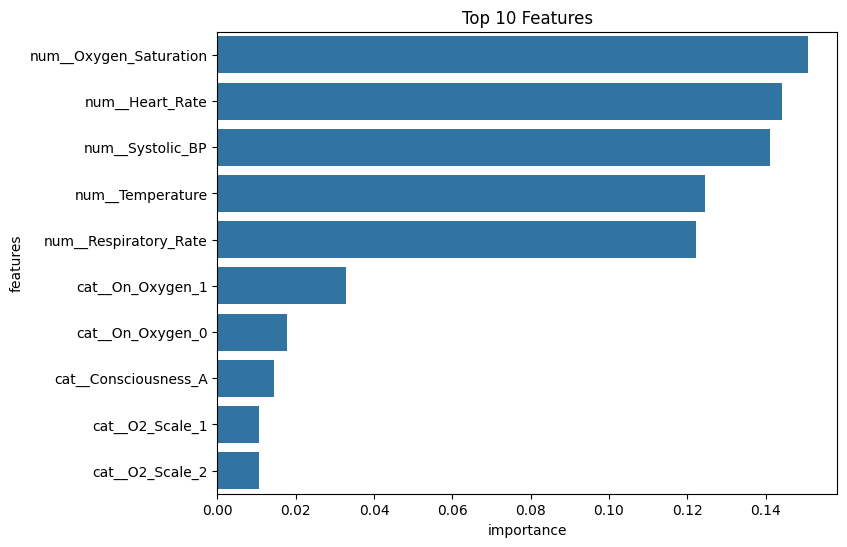

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Urutkan fitur berdasarkan importance
df_feat_imp = df_feat_imp.sort_values(by="importance", ascending=False)

top_n = 10
df_top = df_feat_imp.head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(x="importance", y="features", data=df_top)
plt.title(f"Top {top_n} Features")
plt.show()

